[*********************100%***********************]  7 of 7 completed


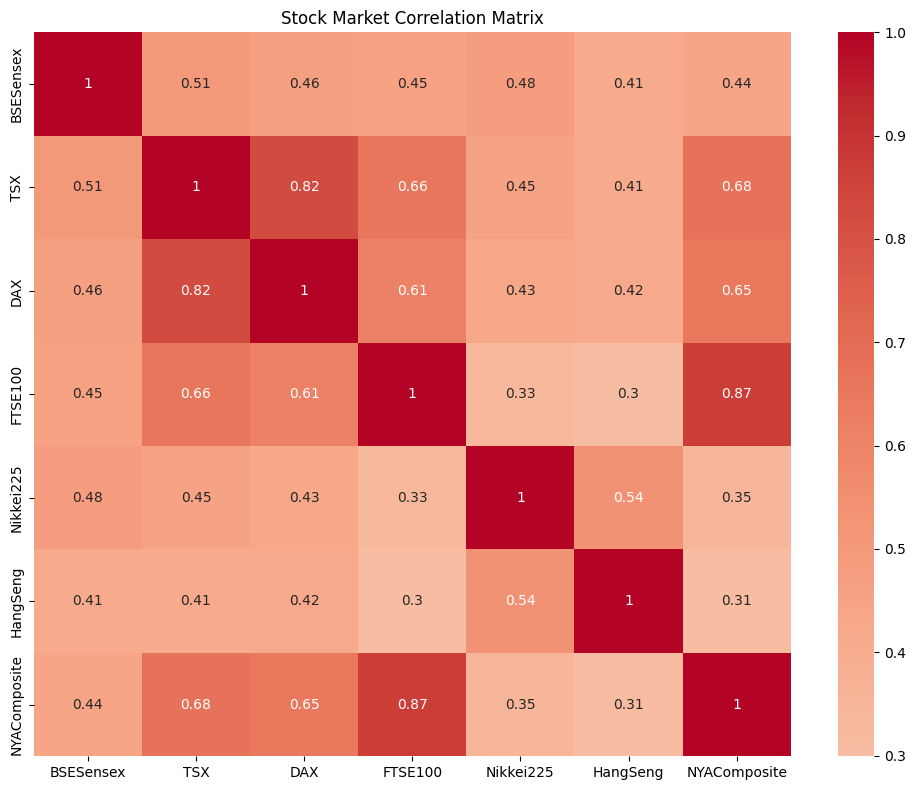

Cointegration Test Results:
BSESensex-TSX: {'Cointegrated': False, 'P-Value': 1.0}
BSESensex-DAX: {'Cointegrated': False, 'P-Value': 0.3214613559891328}
BSESensex-FTSE100: {'Cointegrated': True, 'P-Value': 0.048882841279604614}
BSESensex-Nikkei225: {'Cointegrated': False, 'P-Value': 0.9884397291377688}
BSESensex-HangSeng: {'Cointegrated': False, 'P-Value': 0.2577963670259108}
BSESensex-NYAComposite: {'Cointegrated': True, 'P-Value': 0.006969612349650479}
TSX-DAX: {'Cointegrated': False, 'P-Value': 0.3895633524251631}
TSX-FTSE100: {'Cointegrated': False, 'P-Value': 0.3104831584854971}
TSX-Nikkei225: {'Cointegrated': False, 'P-Value': 0.1930259380154098}
TSX-HangSeng: {'Cointegrated': False, 'P-Value': 0.2638975565989462}
TSX-NYAComposite: {'Cointegrated': False, 'P-Value': 0.2776577170841398}
DAX-FTSE100: {'Cointegrated': False, 'P-Value': 0.12017143449488021}
DAX-Nikkei225: {'Cointegrated': False, 'P-Value': 0.3050651305291395}
DAX-HangSeng: {'Cointegrated': True, 'P-Value': 0.02423261

C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Granger Causality Test Results:
BSESensex → TSX: {'F-statistic': 1.7972738553348797, 'P-value': 0.12631293118768505}
BSESensex → DAX: {'F-statistic': 6.593122849104004, 'P-value': 2.699180736024267e-05}
BSESensex → FTSE100: {'F-statistic': 5.584499980995243, 'P-value': 0.00017332573408422925}
BSESensex → Nikkei225: {'F-statistic': 1.360965274796621, 'P-value': 0.24478709682455613}
BSESensex → HangSeng: {'F-statistic': 1.5979560290966284, 'P-value': 0.17182138256323432}
BSESensex → NYAComposite: {'F-statistic': 16.81803056095383, 'P-value': 9.43722450494229e-14}
TSX → BSESensex: {'F-statistic': 9.776758167101706, 'P-value': 6.838104073906374e-08}
TSX → DAX: {'F-statistic': 0.8355122652094777, 'P-value': 0.5023307150592847}
TSX → FTSE100: {'F-statistic': 5.9775799595793035, 'P-value': 8.419802482486829e-05}
TSX → Nikkei225: {'F-statistic': 1.9216567055222067, 'P-value': 0.10384033144486285}
TSX → HangSeng: {'F-statistic': 2.6539629597736707, 'P-value': 0.03129445785796909}
TSX → NYAComp

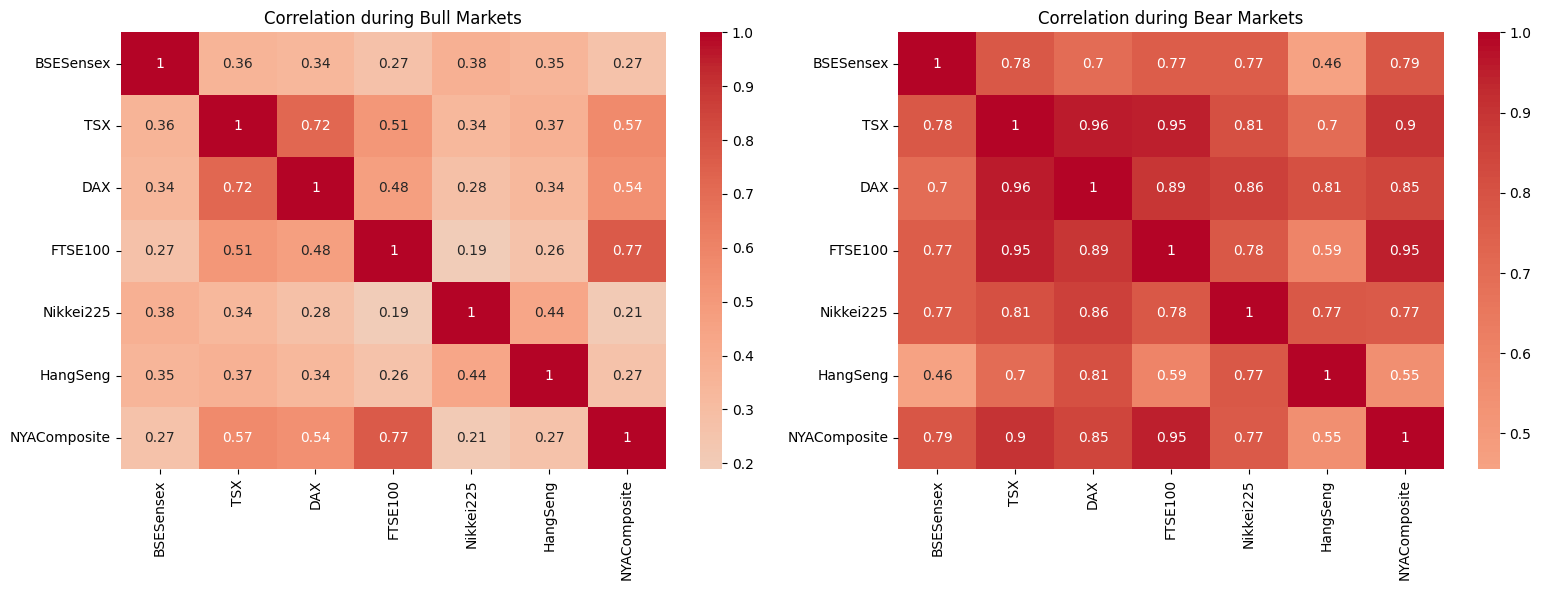

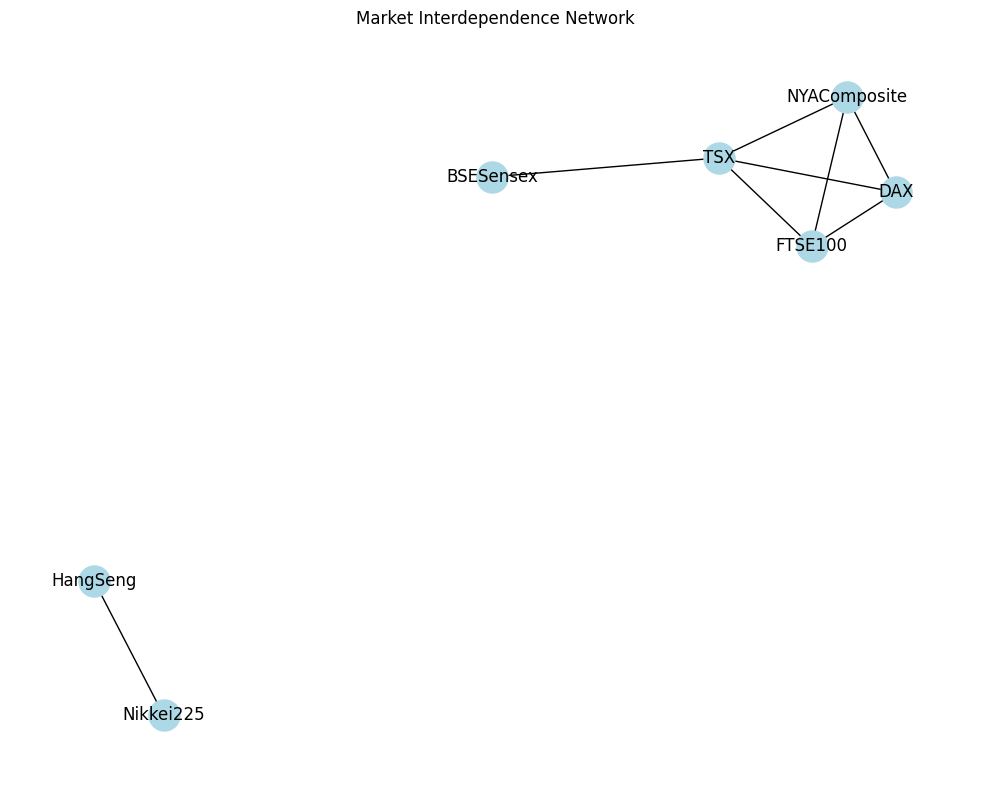


Market Interdependence Networks by Regime:


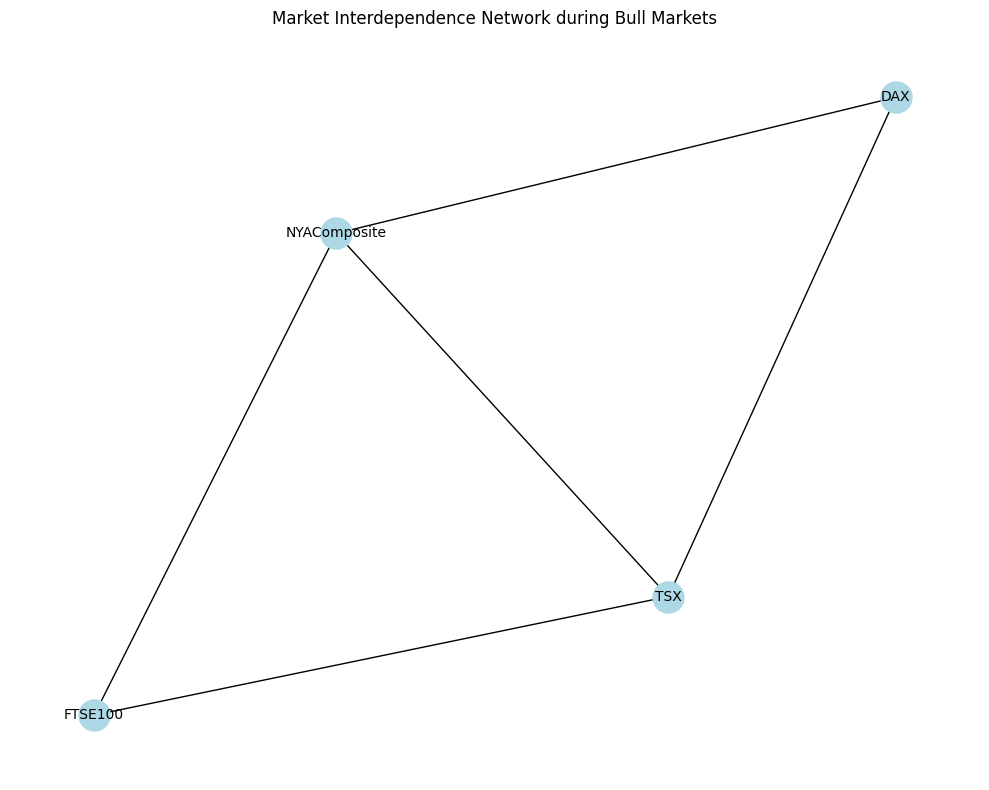

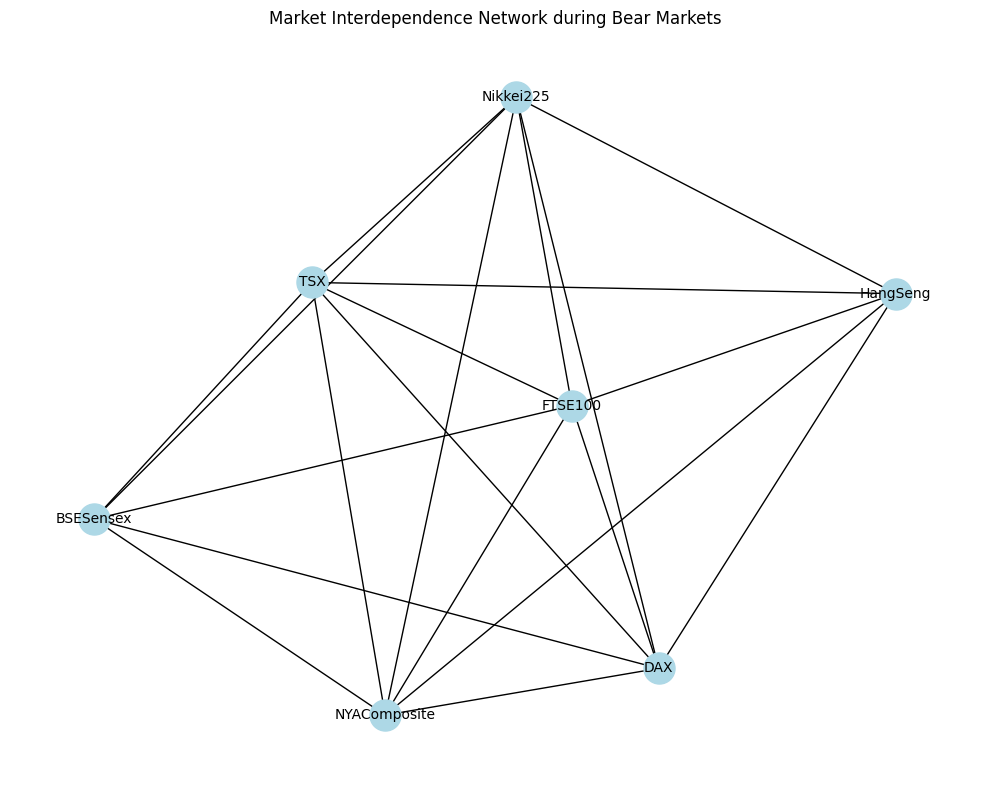

In [31]:
# Global Stock Markets Co-Movement Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.api import VAR
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Download stock market index data
def download_market_data(tickers, start_date, end_date):
    """
    Download historical price data for multiple stock market indices
    
    Parameters:
    -----------
    tickers : list
        List of stock market index tickers
    start_date : str
        Start date for data collection (YYYY-MM-DD)
    end_date : str
        End date for data collection (YYYY-MM-DD)
    
    Returns:
    --------
    DataFrame with adjusted closing prices
    """
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Download market data
market_tickers = [
    '^BSESN',  # BSE Sensex (India)
    '^GSPTSE', # S&P/TSX Composite (Canada)
    '^GDAXI',  # DAX (Germany)
    '^FTSE',   # FTSE 100 (UK)
    '^N225',   # Nikkei 225 (Japan)
    '^HSCI',   # Hang Seng (Hong Kong)
    '^NYA'     # NYSE Composite (US)
]

start_date = '2014-04-01'
end_date = '2024-03-31'

# Fetch market data
market_data = download_market_data(market_tickers, start_date, end_date)

# Clean and prepare data
market_data.columns = [
    'BSESensex', 'TSX', 'DAX', 
    'FTSE100', 'Nikkei225', 'HangSeng', 'NYAComposite'
]
market_data.dropna(inplace=True)

# Calculate returns
market_returns = market_data.pct_change().dropna()

# 1. Correlation Analysis
correlation_matrix = market_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Stock Market Correlation Matrix')
plt.tight_layout()
plt.show()

# 2. Cointegration Analysis
def cointegration_test(x, y):
    """
    Perform Engle-Granger cointegration test
    
    Returns:
    --------
    Tuple of (is_cointegrated, p_value)
    """
    result = coint(x, y)
    p_value = result[1]
    return p_value < 0.05, p_value

# Perform pairwise cointegration tests
cointegration_results = {}
for i in range(len(market_data.columns)):
    for j in range(i+1, len(market_data.columns)):
        x = market_data.iloc[:, i]
        y = market_data.iloc[:, j]
        is_cointegrated, p_value = cointegration_test(x, y)
        cointegration_results[f'{market_data.columns[i]}-{market_data.columns[j]}'] = {
            'Cointegrated': is_cointegrated, 
            'P-Value': p_value
        }

# Print cointegration results
print("Cointegration Test Results:")
for pair, result in cointegration_results.items():
    print(f"{pair}: {result}")

# 3. Vector Autoregression (VAR) Analysis
def fit_var_model(data, max_lags=10):
    """
    Fit Vector Autoregression model and select optimal lag
    
    Returns:
    --------
    Optimal lag order and VAR model
    """
    model = VAR(data)
    results = model.select_order(maxlags=max_lags)
    optimal_lag = results.aic
    var_model = model.fit(optimal_lag)
    return optimal_lag, var_model

# Fit VAR model
var_lag, var_model = fit_var_model(market_returns)
print(f"\nOptimal VAR Lag Order: {var_lag}")
print("\nVAR Model Summary:")
print(var_model.summary())

# 4. Granger Causality Tests
def granger_causality_test(data, variables, max_lag=5):
    """
    Perform Granger causality tests between variables
    
    Returns:
    --------
    Dictionary of Granger causality test results
    """
    causality_results = {}
    for cause_var in variables:
        for effect_var in variables:
            if cause_var != effect_var:
                result = var_model.test_causality(cause_var, effect_var, kind='f')  # Using 'f' as valid kind
                causality_results[f'{cause_var} → {effect_var}'] = {
                    'F-statistic': result.test_statistic, 
                    'P-value': result.pvalue
                }
    return causality_results

# Perform Granger causality tests
causality_results = granger_causality_test(market_returns, market_returns.columns)

print("\nGranger Causality Test Results:")
for relationship, result in causality_results.items():
    print(f"{relationship}: {result}")

# 5. Market Regime Detection (Simple Bull/Bear Market Classification)
def classify_market_regime(returns, threshold=0.2):
    """
    Classify market regime based on cumulative returns
    
    Parameters:
    -----------
    returns : DataFrame
        Market returns
    threshold : float
        Cumulative return threshold for regime classification
    
    Returns:
    --------
    DataFrame of market regimes for each index
    """
    cumulative_returns = (1 + returns).cumprod()
    max_cumulative_returns = cumulative_returns.cummax()

    # Identify market regimes for each column separately
    regimes = pd.DataFrame(index=returns.index)
    for column in returns.columns:
        regimes[column] = np.where(
            cumulative_returns[column] / max_cumulative_returns[column] >= (1 - threshold),
            'Bull Market', 
            'Bear Market'
        )
    
    return regimes

# Classify market regimes
market_regimes = classify_market_regime(market_returns)

# Regime-specific correlation analysis
regime_correlations = {}
for regime in ['Bull Market', 'Bear Market']:
    regime_data = market_returns[market_regimes.eq(regime).all(axis=1)]
    regime_correlations[regime] = regime_data.corr()

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.heatmap(regime_correlations['Bull Market'], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation during Bull Markets')

plt.subplot(1, 2, 2)
sns.heatmap(regime_correlations['Bear Market'], annot=True, cmap='coolwarm', center=0)
plt.title('Correlation during Bear Markets')

plt.tight_layout()
plt.show()

# 6. Network Visualization of Market Interdependence
import networkx as nx

def create_market_network(correlation_matrix, threshold=0.5):
    """
    Create a network graph representing market interdependence
    
    Parameters:
    -----------
    correlation_matrix : DataFrame
        Correlation matrix of market returns
    threshold : float
        Correlation threshold for creating network edges
    
    Returns:
    --------
    NetworkX graph
    """
    G = nx.Graph()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = abs(correlation_matrix.iloc[i, j])
            if corr_value > threshold:
                G.add_edge(
                    correlation_matrix.columns[i], 
                    correlation_matrix.columns[j], 
                    weight=corr_value
                )
    return G

# Create and visualize market interdependence network
market_network = create_market_network(correlation_matrix)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(market_network, k=0.5)
nx.draw_networkx_nodes(market_network, pos, node_color='lightblue', node_size=500)
nx.draw_networkx_edges(market_network, pos)
nx.draw_networkx_labels(market_network, pos)
plt.title('Market Interdependence Network')
plt.axis('off')
plt.tight_layout()
plt.show()

# 6. Network Visualization of Market Interdependence by Regime
import networkx as nx

def create_market_network(correlation_matrix, threshold=0.5):
    """
    Create a network graph representing market interdependence
    
    Parameters:
    -----------
    correlation_matrix : DataFrame
        Correlation matrix of market returns
    threshold : float
        Correlation threshold for creating network edges
    
    Returns:
    --------
    NetworkX graph
    """
    G = nx.Graph()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = abs(correlation_matrix.iloc[i, j])
            if corr_value > threshold:
                G.add_edge(
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    weight=corr_value
                )
    return G

def plot_market_network_by_regime(regime, title, threshold=0.5):
    """
    Plot the market interdependence network for a specific regime
    
    Parameters:
    -----------
    regime : str
        The market regime ('Bull Market' or 'Bear Market')
    title : str
        Title for the plot
    threshold : float
        Correlation threshold for creating network edges
    """
    regime_data = market_returns[market_regimes.eq(regime).all(axis=1)]
    if not regime_data.empty:
        correlation_matrix = regime_data.corr()
        market_network = create_market_network(correlation_matrix, threshold)

        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(market_network, k=0.5)
        nx.draw_networkx_nodes(market_network, pos, node_color='lightblue', node_size=500)
        nx.draw_networkx_edges(market_network, pos)
        nx.draw_networkx_labels(market_network, pos, font_size=10)
        plt.title(title)
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No sufficient data for {regime} to create a network.")

# Plot networks for Bull and Bear Markets
print("\nMarket Interdependence Networks by Regime:")
plot_market_network_by_regime('Bull Market', 'Market Interdependence Network during Bull Markets')
plot_market_network_by_regime('Bear Market', 'Market Interdependence Network during Bear Markets')

# Save results to CSV
# correlation_matrix.to_csv('market_correlation_matrix.csv')
# market_returns.to_csv('market_returns.csv')
# pd.DataFrame.from_dict(causality_results, orient='index').to_csv('granger_causality_results.csv')

# print("\nAnalysis Complete: Results saved to CSV files.")

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


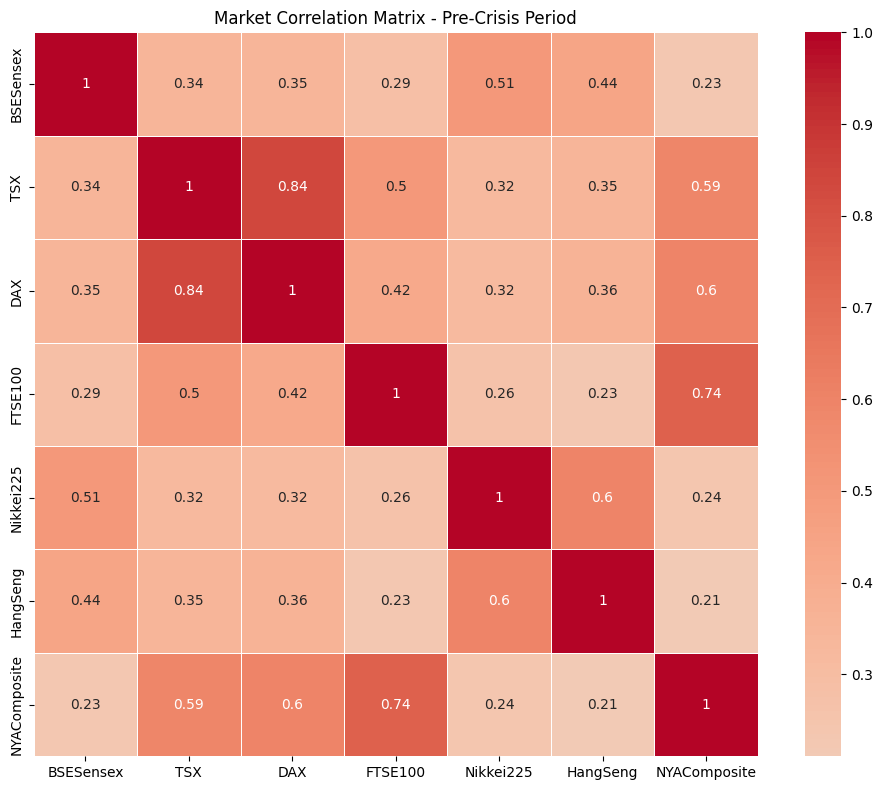

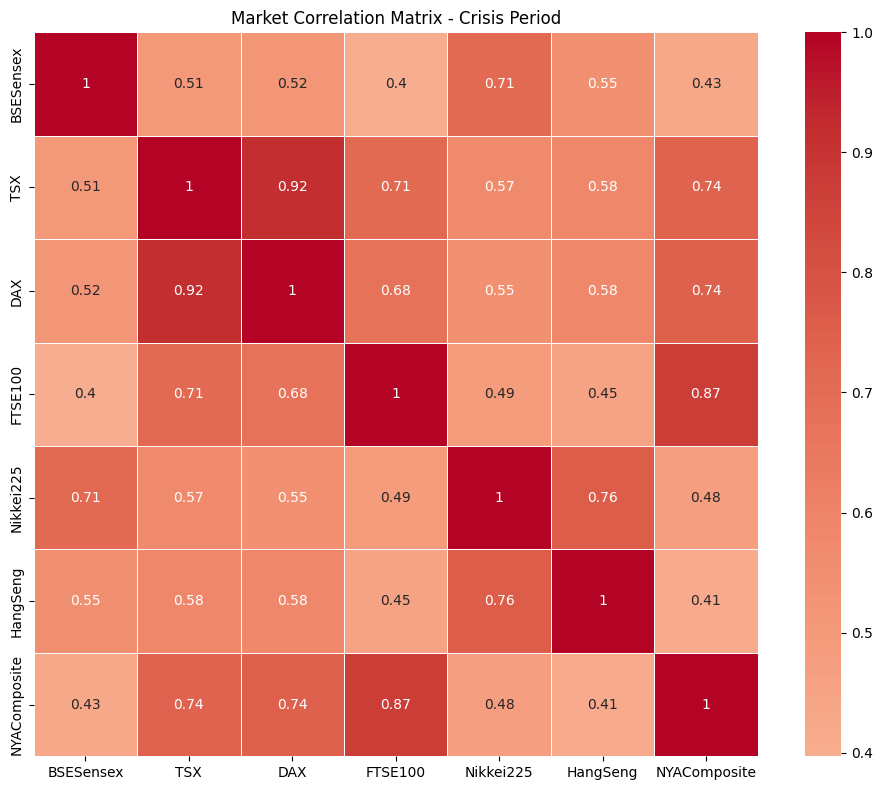

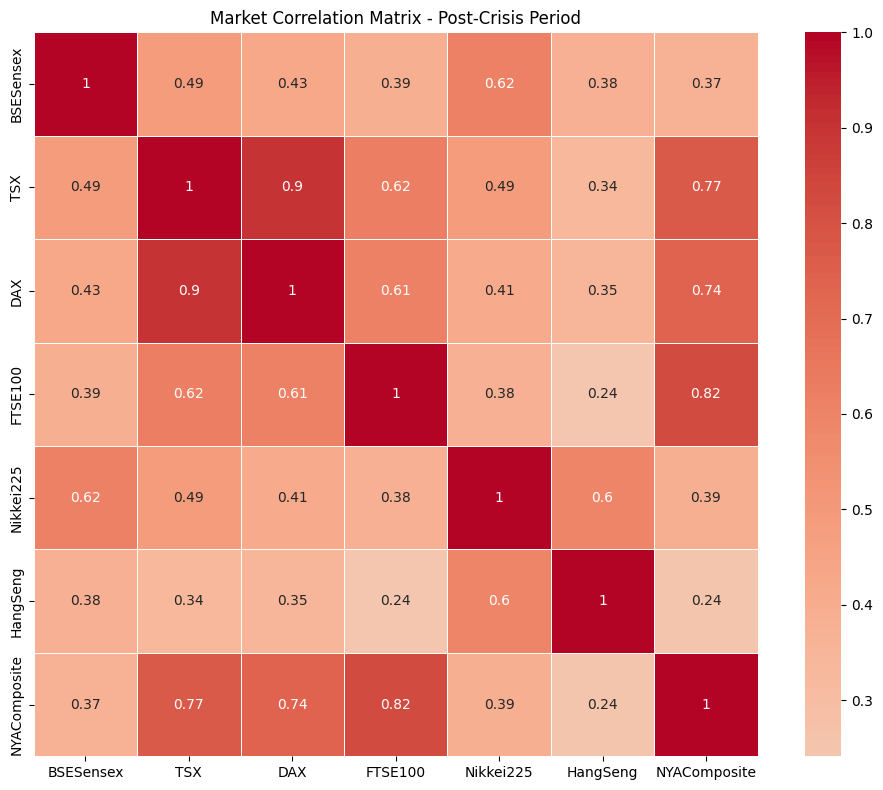


Cointegration Results - Pre-Crisis Period:
BSESensex-TSX: {'T-Statistic': -2.4983996083755486, 'P-Value': 0.2797753012753065, 'Cointegrated': False}
BSESensex-DAX: {'T-Statistic': -0.9602772726944183, 'P-Value': 0.9101256751016366, 'Cointegrated': False}
BSESensex-FTSE100: {'T-Statistic': -2.4751561097776733, 'P-Value': 0.2901344783662335, 'Cointegrated': False}
BSESensex-Nikkei225: {'T-Statistic': -2.2874371772420035, 'P-Value': 0.3798379946350091, 'Cointegrated': False}
BSESensex-HangSeng: {'T-Statistic': -2.2564319452975297, 'P-Value': 0.3954821949324262, 'Cointegrated': False}
BSESensex-NYAComposite: {'T-Statistic': -1.6830366577004434, 'P-Value': 0.6846070474462542, 'Cointegrated': False}
TSX-DAX: {'T-Statistic': -2.0862073234728653, 'P-Value': 0.4835786895574752, 'Cointegrated': False}
TSX-FTSE100: {'T-Statistic': -4.432500429634138, 'P-Value': 0.0015776167864976526, 'Cointegrated': True}
TSX-Nikkei225: {'T-Statistic': -2.714698504961532, 'P-Value': 0.1943368053643646, 'Cointegr

C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



VAR Model Summary:
Optimal Lag Order: 1


C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



VAR Model Summary:
Optimal Lag Order: 3


C:\Users\gagan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



VAR Model Summary:
Optimal Lag Order: 1

Granger Causality Results - Pre-Crisis Period:
BSESensex → NYAComposite: {'F-statistic': 19.177291776347758, 'P-value': 1.2242265320500119e-05}
TSX → NYAComposite: {'F-statistic': 20.660951600730918, 'P-value': 5.657743649993745e-06}
DAX → TSX: {'F-statistic': 5.1480500332464185, 'P-value': 0.023329902020296764}
DAX → NYAComposite: {'F-statistic': 21.37731205276047, 'P-value': 3.901086963115663e-06}
FTSE100 → Nikkei225: {'F-statistic': 6.494678033597591, 'P-value': 0.010859893954411226}
Nikkei225 → HangSeng: {'F-statistic': 18.022150832512327, 'P-value': 2.2371678868584614e-05}
Nikkei225 → NYAComposite: {'F-statistic': 46.1976028895845, 'P-value': 1.2412478868742992e-11}
HangSeng → DAX: {'F-statistic': 8.415224190306315, 'P-value': 0.0037428884216842502}
HangSeng → NYAComposite: {'F-statistic': 12.326159181412084, 'P-value': 0.00045199180474800256}
NYAComposite → Nikkei225: {'F-statistic': 7.249472739048901, 'P-value': 0.007124169450177123}

Gr

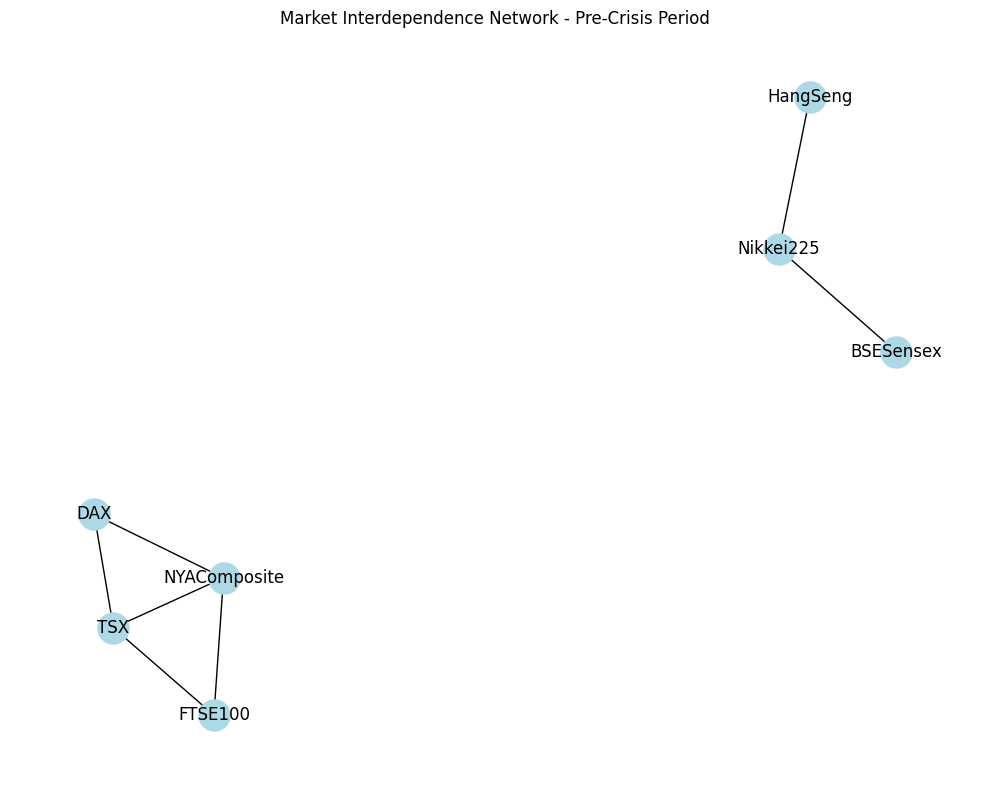

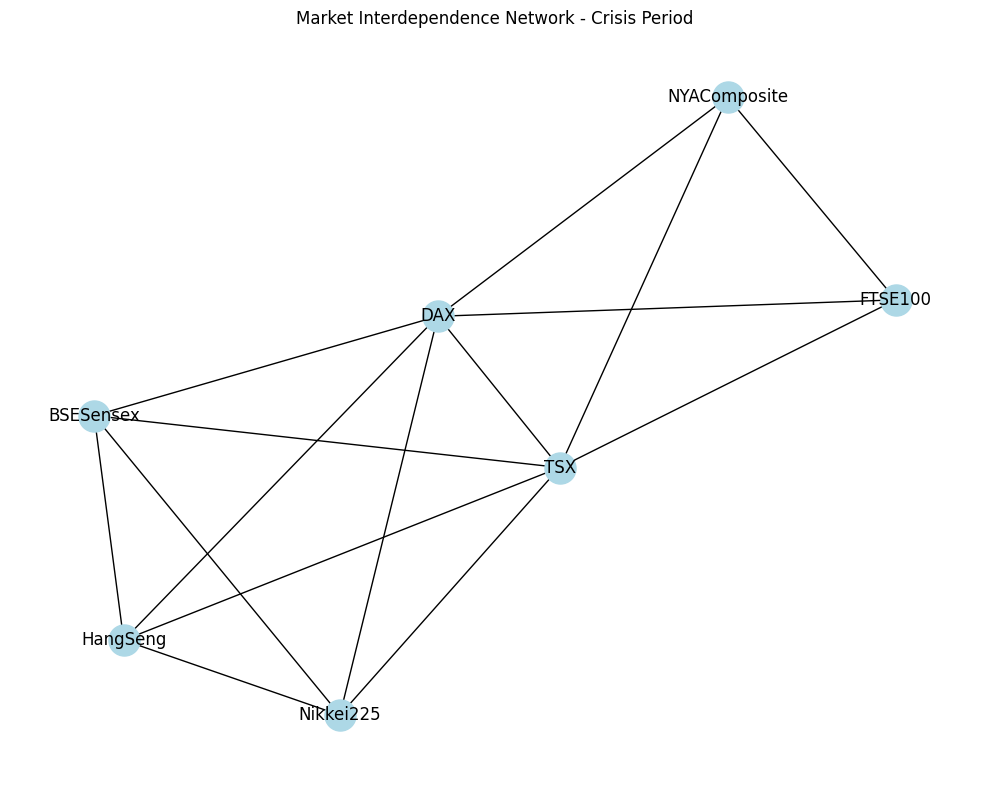

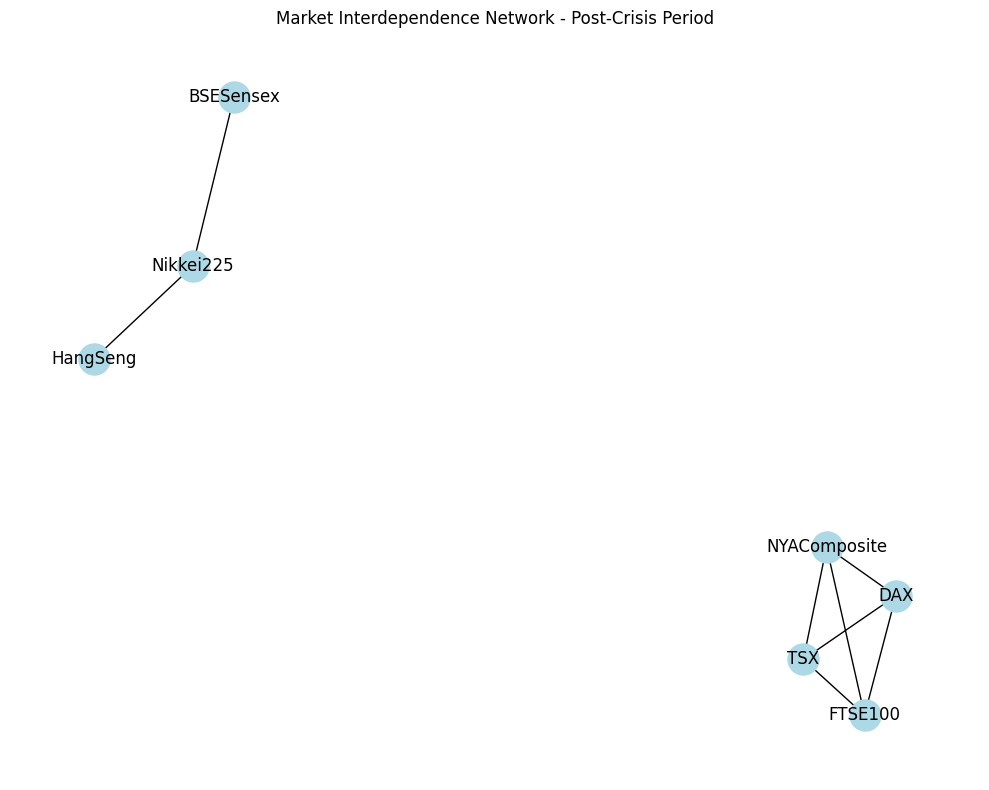


Analysis Complete: Results saved to CSV files.


In [ ]:
# Stock Market Co-Movement Analysis during 2007-2008 Financial Crisis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.api import VAR
from scipy import stats
import networkx as nx

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Download stock market index data for financial crisis period
def download_market_data(tickers, start_date, end_date):
    """
    Download historical price data for multiple stock market indices
    
    Parameters:
    -----------
    tickers : list
        List of stock market index tickers
    start_date : str
        Start date for data collection (YYYY-MM-DD)
    end_date : str
        End date for data collection (YYYY-MM-DD)
    
    Returns:
    --------
    DataFrame with adjusted closing prices
    """
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Define market tickers (global indices)
market_tickers = [
    '^BSESN',  # BSE Sensex (India)
    '^GSPTSE', # S&P/TSX Composite (Canada)
    '^GDAXI',  # DAX (Germany)
    '^FTSE',   # FTSE 100 (UK)
    '^N225',   # Nikkei 225 (Japan)
    '^HSI',    # Hang Seng (Hong Kong)
    '^NYA'     # NYSE Composite (US)
]

# Define time periods
pre_crisis_start = '2005-01-01'
pre_crisis_end = '2007-06-30'
crisis_start = '2007-07-01'
crisis_end = '2009-06-30'
post_crisis_start = '2009-07-01'
post_crisis_end = '2011-06-30'

# Fetch market data for different periods
pre_crisis_data = download_market_data(market_tickers, pre_crisis_start, pre_crisis_end)
crisis_data = download_market_data(market_tickers, crisis_start, crisis_end)
post_crisis_data = download_market_data(market_tickers, post_crisis_start, post_crisis_end)

# Clean and rename columns
def prepare_data(data):
    data.columns = [
        'BSESensex', 'TSX', 'DAX', 
        'FTSE100', 'Nikkei225', 'HangSeng', 'NYAComposite'
    ]
    return data.dropna()

pre_crisis_data = prepare_data(pre_crisis_data)
crisis_data = prepare_data(crisis_data)
post_crisis_data = prepare_data(post_crisis_data)

# Calculate returns
def calculate_returns(data):
    return data.pct_change().dropna()

pre_crisis_returns = calculate_returns(pre_crisis_data)
crisis_returns = calculate_returns(crisis_data)
post_crisis_returns = calculate_returns(post_crisis_data)

# Correlation Analysis Function
def correlation_analysis(returns, title):
    """
    Perform correlation analysis and visualize results
    
    Parameters:
    -----------
    returns : DataFrame
        Market returns data
    title : str
        Title for correlation heatmap
    
    Returns:
    --------
    Correlation matrix
    """
    correlation_matrix = returns.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, cbar=True, linewidths=0.5)
    plt.title(f'Market Correlation Matrix - {title}')
    plt.tight_layout()
    plt.show()
    
    return correlation_matrix

# Correlation analysis for different periods
pre_crisis_corr = correlation_analysis(pre_crisis_returns, 'Pre-Crisis Period')
crisis_corr = correlation_analysis(crisis_returns, 'Crisis Period')
post_crisis_corr = correlation_analysis(post_crisis_returns, 'Post-Crisis Period')

# Cointegration Analysis Function
def cointegration_analysis(data):
    """
    Perform Engle-Granger cointegration test
    
    Parameters:
    -----------
    data : DataFrame
        Market price data
    
    Returns:
    --------
    Dict of cointegration test results
    """
    from statsmodels.tsa.stattools import coint
    
    cointegration_results = {}
    columns = data.columns
    
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            x = data.iloc[:, i]
            y = data.iloc[:, j]
            
            # Perform cointegration test
            t_statistic, p_value, _ = coint(x, y)
            
            cointegration_results[f'{columns[i]}-{columns[j]}'] = {
                'T-Statistic': t_statistic,
                'P-Value': p_value,
                'Cointegrated': p_value < 0.05
            }
    
    return cointegration_results

# Perform cointegration analysis for different periods
pre_crisis_coint = cointegration_analysis(pre_crisis_data)
crisis_coint = cointegration_analysis(crisis_data)
post_crisis_coint = cointegration_analysis(post_crisis_data)

# Print cointegration results
def print_cointegration_results(results, period):
    print(f"\nCointegration Results - {period}:")
    for pair, result in results.items():
        print(f"{pair}: {result}")

print_cointegration_results(pre_crisis_coint, "Pre-Crisis Period")
print_cointegration_results(crisis_coint, "Crisis Period")
print_cointegration_results(post_crisis_coint, "Post-Crisis Period")

# Vector Autoregression (VAR) Analysis
def var_analysis(returns):
    """
    Perform Vector Autoregression analysis
    
    Parameters:
    -----------
    returns : DataFrame
        Market returns data
    
    Returns:
    --------
    VAR model and optimal lag
    """
    from statsmodels.tsa.api import VAR
    
    model = VAR(returns)
    results = model.select_order(maxlags=15)
    optimal_lag = results.aic
    
    var_model = model.fit(optimal_lag)
    
    print("\nVAR Model Summary:")
    print(f"Optimal Lag Order: {optimal_lag}")
    
    return var_model, optimal_lag

# Perform VAR analysis for different periods
pre_crisis_var, pre_crisis_lag = var_analysis(pre_crisis_returns)
crisis_var, crisis_lag = var_analysis(crisis_returns)
post_crisis_var, post_crisis_lag = var_analysis(post_crisis_returns)

# Granger Causality Analysis
def granger_causality_analysis(var_model, returns):
    """
    Perform Granger causality tests
    
    Parameters:
    -----------
    var_model : VAR model
        Fitted Vector Autoregression model
    returns : DataFrame
        Market returns data
    
    Returns:
    --------
    Dict of Granger causality test results
    """
    causality_results = {}
    variables = returns.columns
    
    for cause_var in variables:
        for effect_var in variables:
            if cause_var != effect_var:
                result = var_model.test_causality(cause_var, effect_var, kind='f')
                causality_results[f'{cause_var} → {effect_var}'] = {
                    'F-statistic': result.test_statistic, 
                    'P-value': result.pvalue
                }
    
    return causality_results

# Perform Granger causality analysis for different periods
pre_crisis_causality = granger_causality_analysis(pre_crisis_var, pre_crisis_returns)
crisis_causality = granger_causality_analysis(crisis_var, crisis_returns)
post_crisis_causality = granger_causality_analysis(post_crisis_var, post_crisis_returns)

# Print Granger Causality Results
def print_causality_results(results, period):
    print(f"\nGranger Causality Results - {period}:")
    significant_results = {k: v for k, v in results.items() if v['P-value'] < 0.05}
    for relationship, result in significant_results.items():
        print(f"{relationship}: {result}")

print_causality_results(pre_crisis_causality, "Pre-Crisis Period")
print_causality_results(crisis_causality, "Crisis Period")
print_causality_results(post_crisis_causality, "Post-Crisis Period")

# Network Visualization of Market Interdependence
def create_market_network(correlation_matrix, threshold=0.5):
    """
    Create a network graph representing market interdependence
    
    Parameters:
    -----------
    correlation_matrix : DataFrame
        Correlation matrix of market returns
    threshold : float
        Correlation threshold for creating network edges
    
    Returns:
    --------
    NetworkX graph
    """
    G = nx.Graph()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = abs(correlation_matrix.iloc[i, j])
            if corr_value > threshold:
                G.add_edge(
                    correlation_matrix.columns[i], 
                    correlation_matrix.columns[j], 
                    weight=corr_value
                )
    return G

# Create network graphs for different periods
pre_crisis_network = create_market_network(pre_crisis_corr)
crisis_network = create_market_network(crisis_corr)
post_crisis_network = create_market_network(post_crisis_corr)

# Visualize networks
def visualize_network(network, title):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(network, k=0.5)
    nx.draw_networkx_nodes(network, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(network, pos)
    nx.draw_networkx_labels(network, pos)
    plt.title(f'Market Interdependence Network - {title}')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_network(pre_crisis_network, 'Pre-Crisis Period')
visualize_network(crisis_network, 'Crisis Period')
visualize_network(post_crisis_network, 'Post-Crisis Period')

# Save results to CSV
# pre_crisis_corr.to_csv('pre_crisis_correlation.csv')
# crisis_corr.to_csv('crisis_correlation.csv')
# post_crisis_corr.to_csv('post_crisis_correlation.csv')

print("\nAnalysis Complete: Results saved to CSV files.")

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  7 of 7 completed


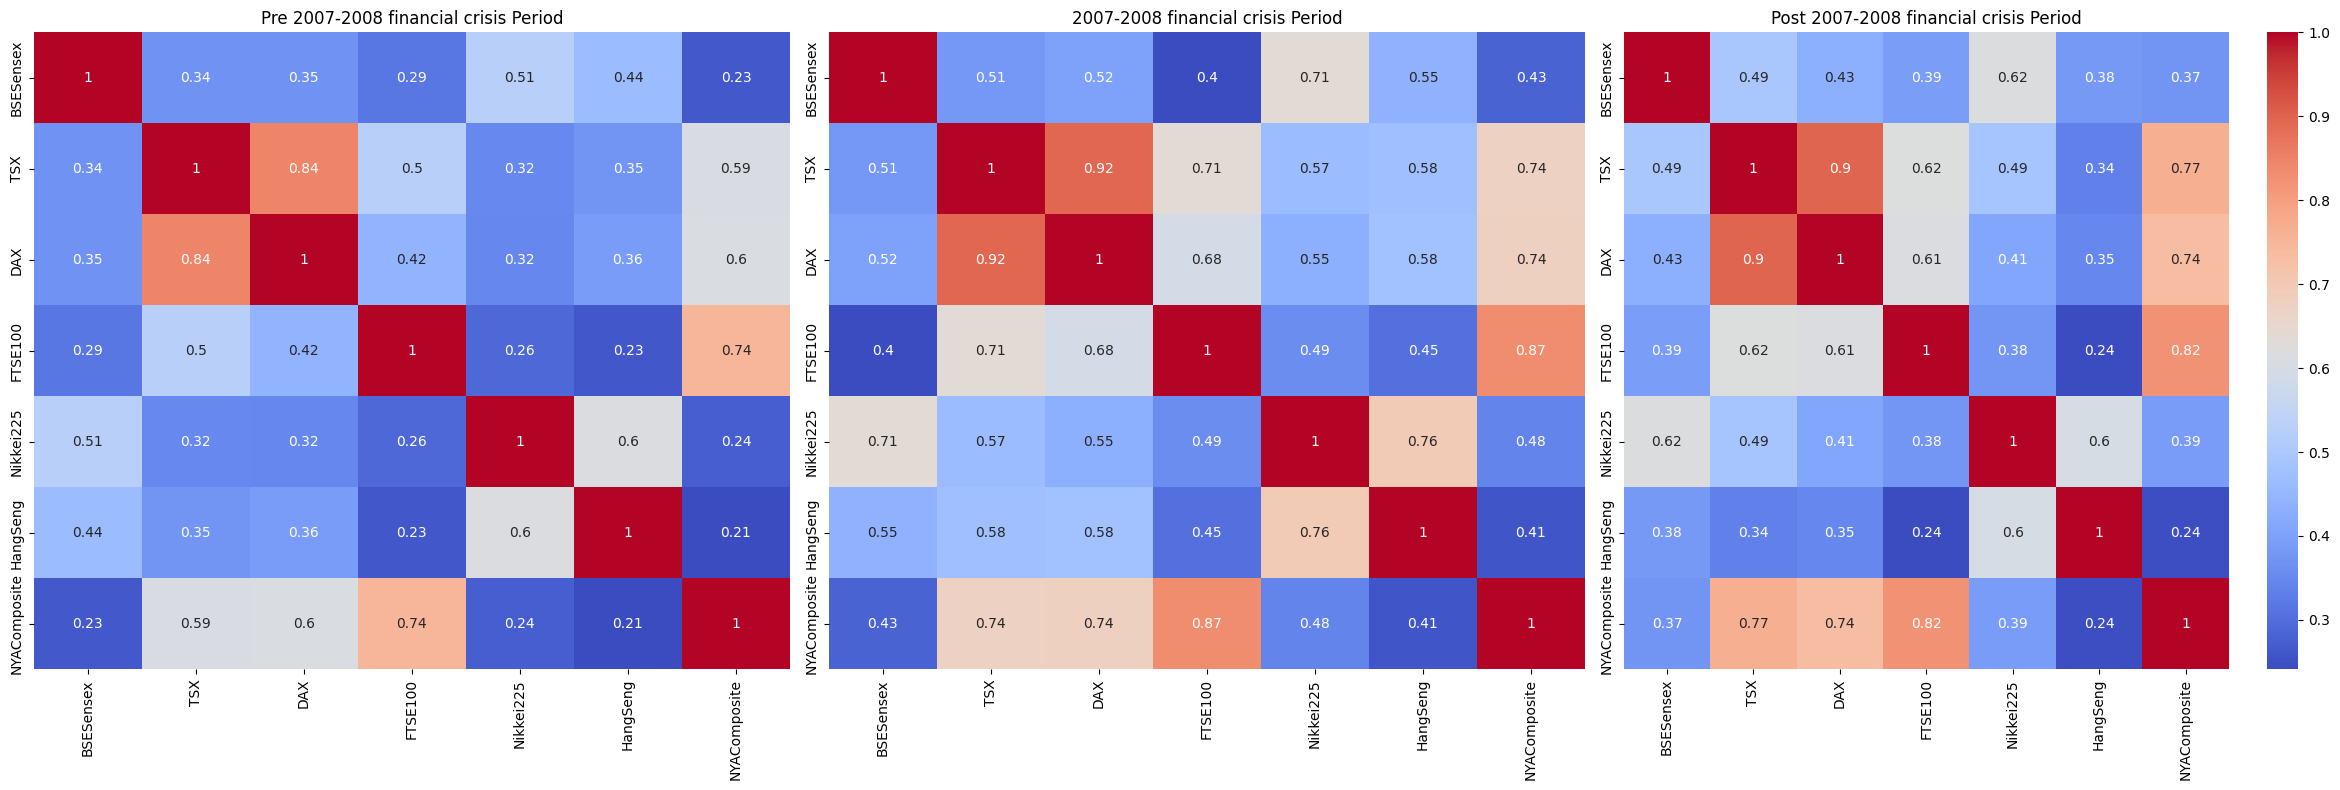

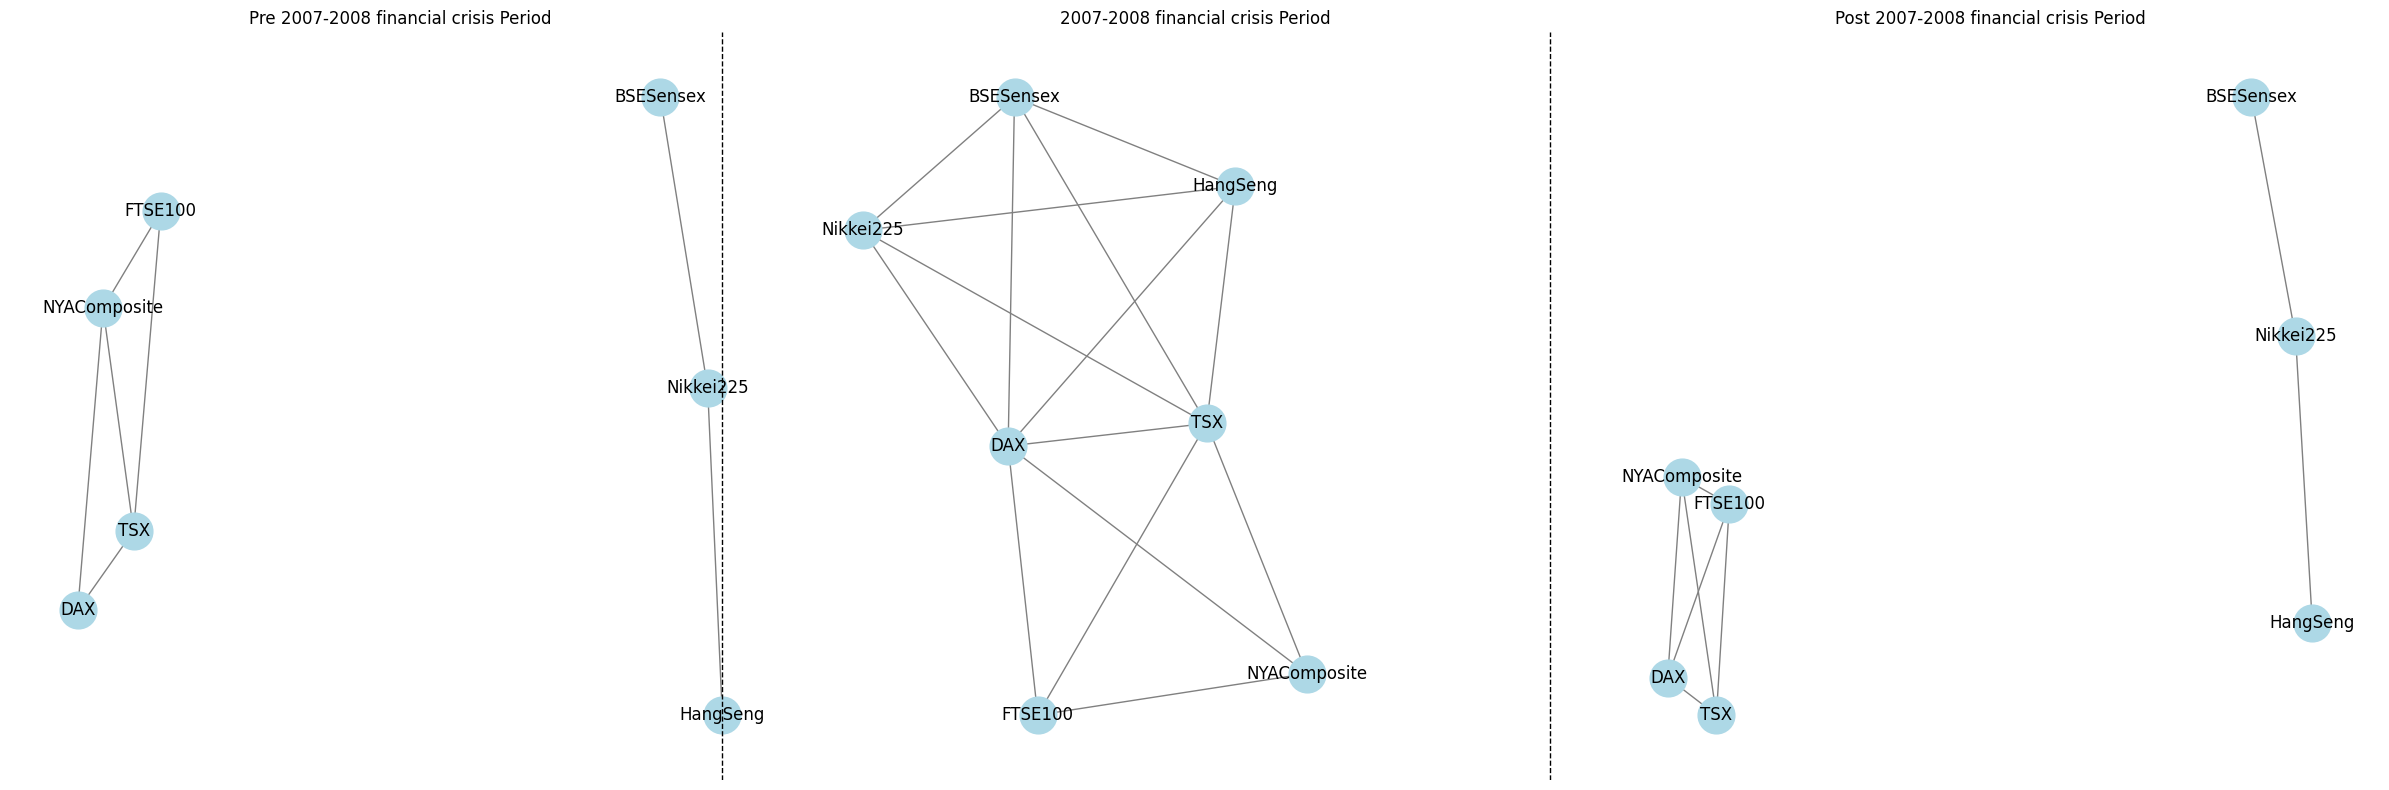

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.api import VAR
from scipy import stats
import networkx as nx

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Download stock market index data for financial crisis period
def download_market_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
    return data

# Define market tickers (global indices)
market_tickers = ['^BSESN', '^GSPTSE', '^GDAXI', '^FTSE', '^N225', '^HSI', '^NYA']
pre_crisis_start = '2005-01-01'; pre_crisis_end = '2007-06-30'
crisis_start = '2007-07-01'; crisis_end = '2009-06-30'
post_crisis_start = '2009-07-01'; post_crisis_end = '2011-06-30'

pre_crisis_data = download_market_data(market_tickers, pre_crisis_start, pre_crisis_end)
crisis_data = download_market_data(market_tickers, crisis_start, crisis_end)
post_crisis_data = download_market_data(market_tickers, post_crisis_start, post_crisis_end)

def prepare_data(data):
    data.columns = ['BSESensex', 'TSX', 'DAX', 'FTSE100', 'Nikkei225', 'HangSeng', 'NYAComposite']
    return data.dropna()

pre_crisis_data = prepare_data(pre_crisis_data)
crisis_data = prepare_data(crisis_data)
post_crisis_data = prepare_data(post_crisis_data)

def calculate_returns(data):
    return data.pct_change().dropna()

pre_crisis_returns = calculate_returns(pre_crisis_data)
crisis_returns = calculate_returns(crisis_data)
post_crisis_returns = calculate_returns(post_crisis_data)

# Correlation Analysis Function
def correlation_analysis(returns):
    return returns.corr()

pre_crisis_corr = correlation_analysis(pre_crisis_returns)
crisis_corr = correlation_analysis(crisis_returns)
post_crisis_corr = correlation_analysis(post_crisis_returns)

# Plot all correlation heatmaps in a single figure
def plot_correlation_heatmaps():
    fig, axs = plt.subplots(1, 3, figsize=(24, 8))
    sns.heatmap(pre_crisis_corr, annot=True, cmap='coolwarm', ax=axs[0], cbar=False)
    axs[0].set_title('Pre 2007-2008 financial crisis Period')
    
    sns.heatmap(crisis_corr, annot=True, cmap='coolwarm', ax=axs[1], cbar=False)
    axs[1].set_title('2007-2008 financial crisis Period')
    
    sns.heatmap(post_crisis_corr, annot=True, cmap='coolwarm', ax=axs[2], cbar=True)
    axs[2].set_title('Post 2007-2008 financial crisis Period')
    
    plt.tight_layout()
    plt.show()

# Network Visualization of Market Interdependence
def create_market_network(correlation_matrix, threshold=0.5):
    G = nx.Graph()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            corr_value = abs(correlation_matrix.iloc[i, j])
            if corr_value > threshold:
                G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j], weight=corr_value)
    return G

pre_crisis_network = create_market_network(pre_crisis_corr)
crisis_network = create_market_network(crisis_corr)
post_crisis_network = create_market_network(post_crisis_corr)

def visualize_all_networks():
    fig, axs = plt.subplots(1, 3, figsize=(24, 8))
    networks = [(pre_crisis_network, 'Pre 2007-2008 financial crisis Period'), 
                (crisis_network, '2007-2008 financial crisis Period'), 
                (post_crisis_network, 'Post 2007-2008 financial crisis Period')]

    for i, (network, title) in enumerate(networks):
        pos = nx.spring_layout(network, seed=42)
        nx.draw(network, pos, ax=axs[i], with_labels=True, node_color='lightblue', edge_color='gray', node_size=700)
        axs[i].set_title(title)
        axs[i].axis('off')
    
    # Add vertical lines as partition
    fig.subplots_adjust(wspace=0.1)
    for ax in axs[:-1]:
        ax.axvline(x=1, color='black', linestyle='--', lw=1)

    plt.tight_layout()
    plt.show()

# Execute plots
plot_correlation_heatmaps()
visualize_all_networks()
